- **Author**: LIKE NING
- **Manuscript**: 
- **Creation date**: 2025-01-16
- **Latest update**: 2025-04-03 \
查看albedo的变化

In [1]:
import os
# warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import salem
import xarray as xr
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
import cmaps
import geocat.viz as gv
from xarrayMannKendall import Mann_Kendall_test

import easyclimate as ecl
import ultraplot as uplt
# 全局设置普通字体和数学字体
uplt.rc['font.family'] = ['Times New Roman', 'FangSong']
uplt.rc['mathtext.fontset'] = 'stix'

In [2]:
current_dir = os.getcwd()
data_dir = os.path.abspath(os.path.join(current_dir, "albedo_yr"))
print(data_dir)
tibet_shp = os.path.join(current_dir,"shpfiles","tibet.shp")
tibetshp=gpd.read_file(tibet_shp)
# data_dir='/home/ninglk/Chooyu/1_albedo/16Jan25/albedo_yr'
# 定义一个标准中国区 ALBERS 投影
Alberts_China = ccrs.AlbersEqualArea(
    central_longitude=105, standard_parallels=(25.0, 47.0))

/home/ninglk/Chooyu/1_albedo/2Apr25/albedo_yr


In [3]:
albedo_daily= xr.open_dataset(os.path.join(current_dir,'albedo_2001-2020.nc') )
del albedo_daily.attrs['history']
# albedo_daily_fldmean.sel(time='2020').Band1[:,0,0].plot()
# ds = albedo_daily.sel(time=slice('2010', '2020'))
# if not isinstance(albedo_daily_fldmean['time'].values[0], np.datetime64):
#     albedo_daily_fldmean['time'] = xr.decode_cf(albedo_daily_fldmean).time
# annual_mean = ds.mean(dim='time')

In [4]:
albedo_fldmean = ecl.utility.get_weighted_spatial_data(albedo_daily, lat_dim='lat', lon_dim='lon',
                                                        method='cos_lat').mean(dim=('lat','lon'))

In [7]:
albedo_fldmean

<xarray.Dataset> Size: 117kB
Dimensions:  (time: 7305)
Coordinates:
  * time     (time) datetime64[ns] 58kB 2001-01-01 2001-01-02 ... 2020-12-31
Data variables:
    Band1    (time) float64 58kB 214.6 218.4 223.3 226.1 ... 215.5 214.8 197.4
Attributes:
    CDI:                 Climate Data Interface version 2.4.4 (https://mpimet...
    Conventions:         CF-1.5
    GDAL_AREA_OR_POINT:  Area
    GDAL:                GDAL 3.1.4, released 2020/10/20
    pyproj_srs:          +proj=longlat +datum=WGS84 +no_defs
    CDO:                 Climate Data Operators version 2.4.4 (https://mpimet...

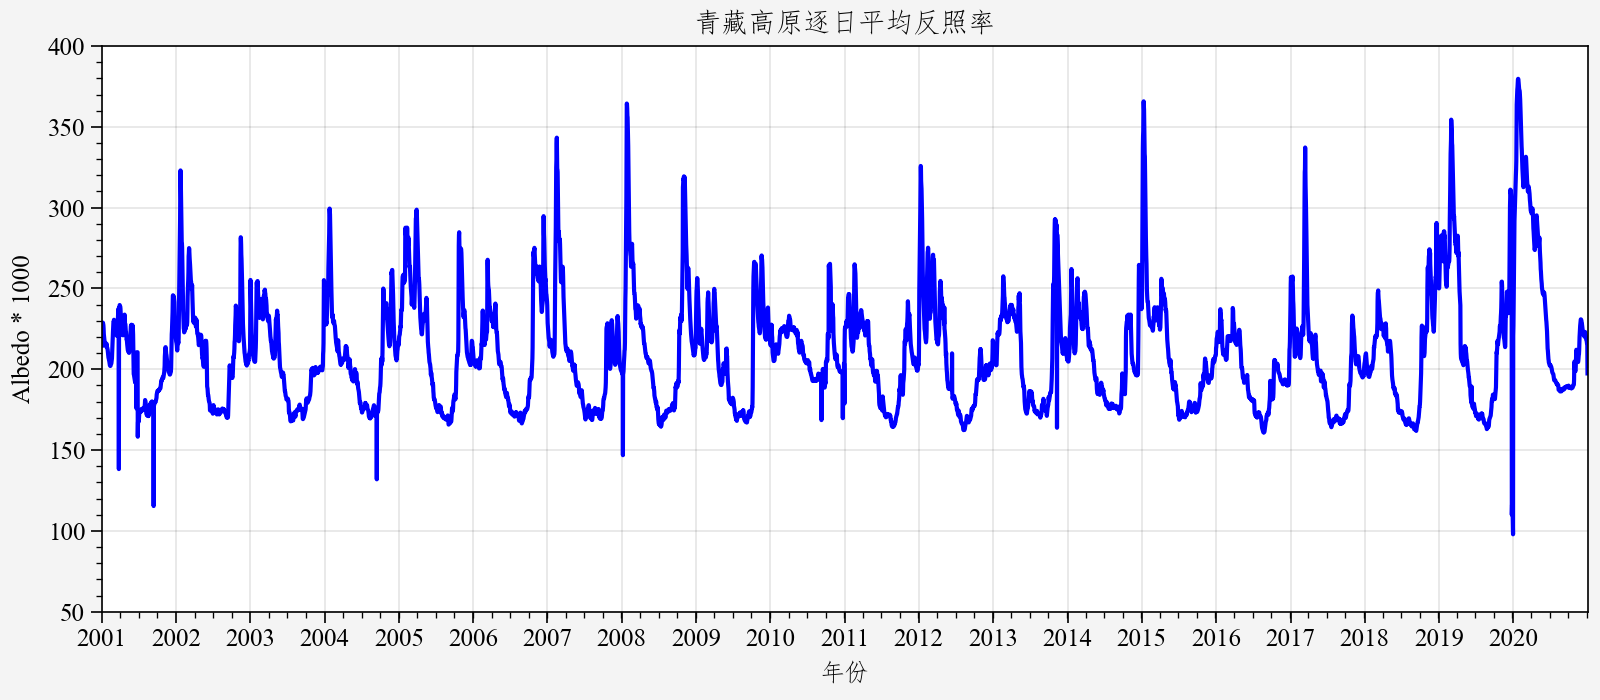

In [40]:
fig, ax = uplt.subplot(figsize=(8, 3.5))
# 数据
x = albedo_fldmean.time
y = albedo_fldmean.Band1

# 绘制折线图
ax.plot(x, y, color='blue', label='Albedo')


# 设置轴标签
ax.set_xlabel("年份")  # x轴标签
ax.set_ylabel("Albedo * 1000")  # y轴标签

# 设置刻度范围
ax.set_xlim([pd.Timestamp('2001-01-01'), pd.Timestamp('2020-12-31')])  # x轴范围
ax.set_ylim([50, 400])  # y轴范围

# 添加网格
ax.format(
    xlim=(np.datetime64("2001-01-01"), np.datetime64("2020-12-31")),
    xlocator="year",
    # xminorlocator="month",  # minor ticks every month
    xformatter="%Y",
    title="青藏高原逐日平均反照率",
    xrotation=0
)
fig.save(
    os.path.join(current_dir, 'figures',"alebdo_daily.pdf"),
    transparent=True,
    dpi=600,
    pad_inches=0.05,
    bbox_inches="tight",
    )

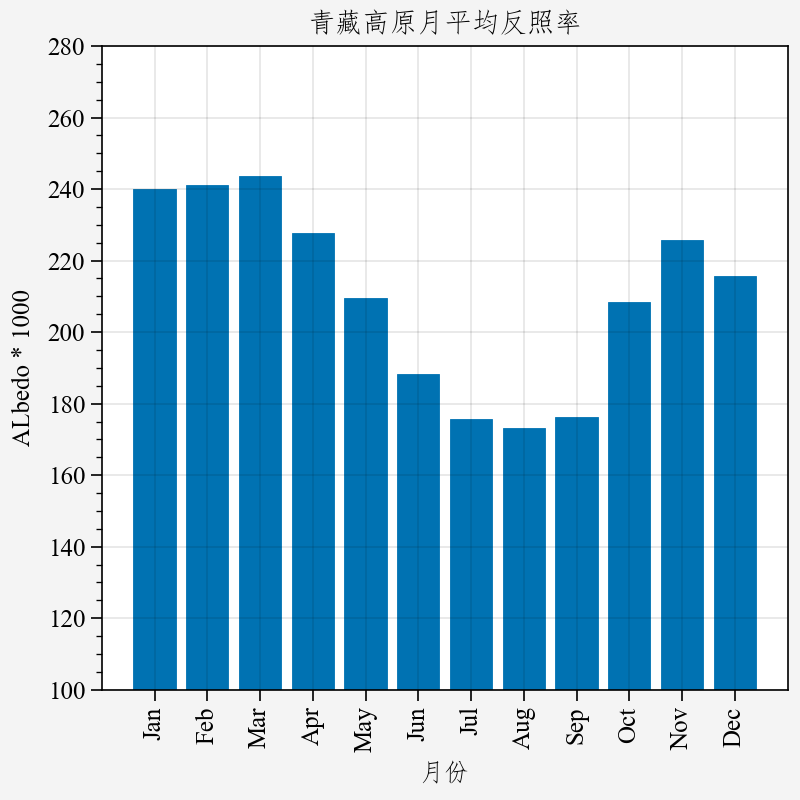

In [41]:
import calendar
albedo_seasonal = ecl.calc_seasonal_cycle_mean(albedo_fldmean, dim='time')
fig, ax = uplt.subplot(figsize=(4, 4))
ax.bar(albedo_seasonal.Band1, width=0.8,)
# Set x-axis labels to month abbreviations
ax.set_xticks(range(1, 13))  # Ensure 12 ticks for 12 months
# ax.set_xticklabels(calendar.month_abbr[1:])  # Use month abbreviations
ax.format(
    ylim=(100,280),
    ylabel='ALbedo * 1000',
    xlim=(0, 13),
    xlabel='月份',
    title="青藏高原月平均反照率",
    xrotation=90,
    xticklabels=calendar.month_abbr[1:],
)
fig.save(
    os.path.join(current_dir, 'figures',"alebdo_monthly.pdf"),
    transparent=True,
    dpi=600,
    pad_inches=0.05,
    bbox_inches="tight",
    )


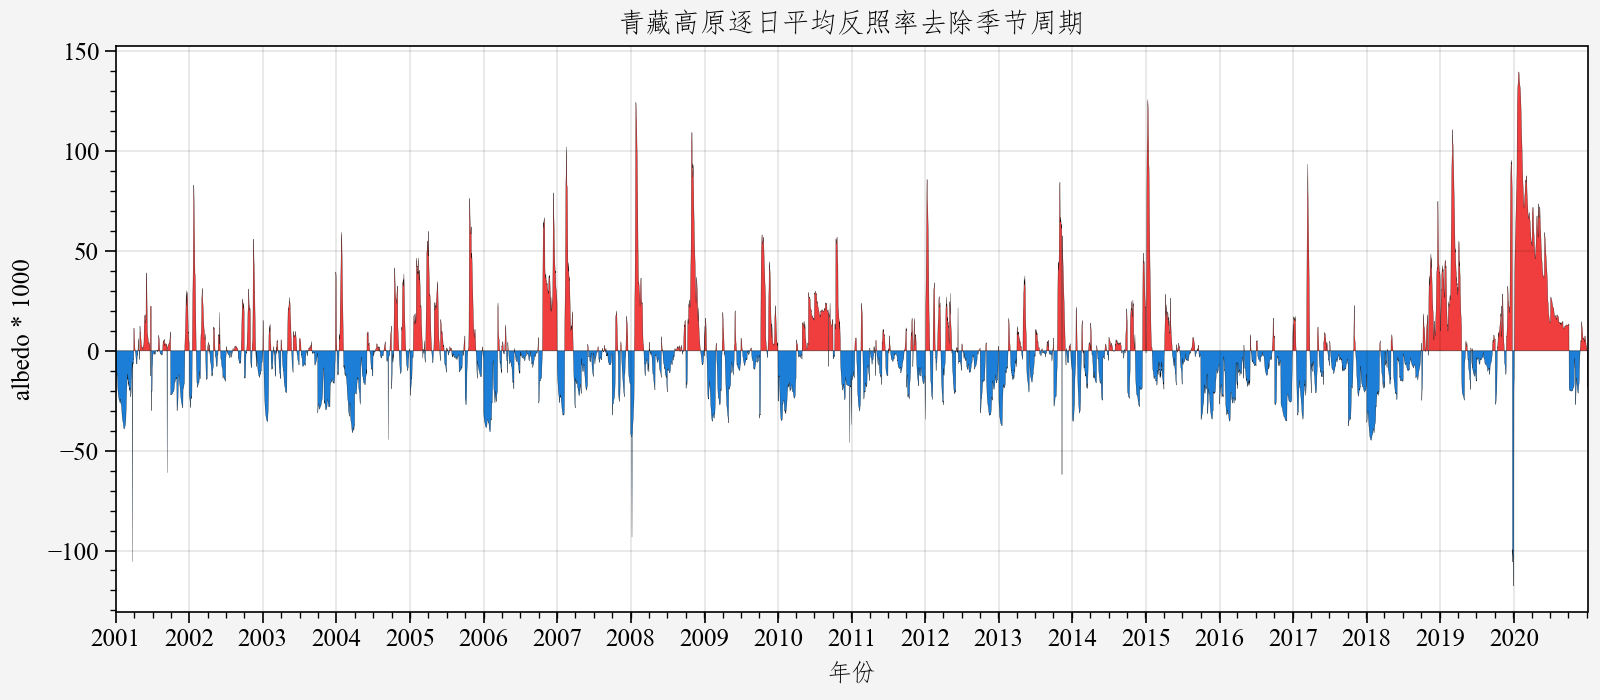

In [42]:
albedo_remove_seasonal = ecl.remove_seasonal_cycle_mean(albedo_fldmean, dim='time')
fig, ax = uplt.subplot(figsize=(8, 3.5))
ax.area(albedo_remove_seasonal.Band1, negpos=True, lw=0.1, edgecolor='black')
# 添加网格
ax.format(
    xlim=(np.datetime64("2001-01-01"), np.datetime64("2020-12-31")),
    xlocator="year",
    xlabel='年份',
    ylabel='albedo * 1000',
    # xminorlocator="month",  # minor ticks every month
    xformatter="%Y",
    title="青藏高原逐日平均反照率去除季节周期",
    xrotation=0
)

fig.save(
    os.path.join(current_dir, 'figures',"alebdo_去周期.pdf"),
    transparent=True,
    dpi=600,
    pad_inches=0.05,
    bbox_inches="tight",
    )


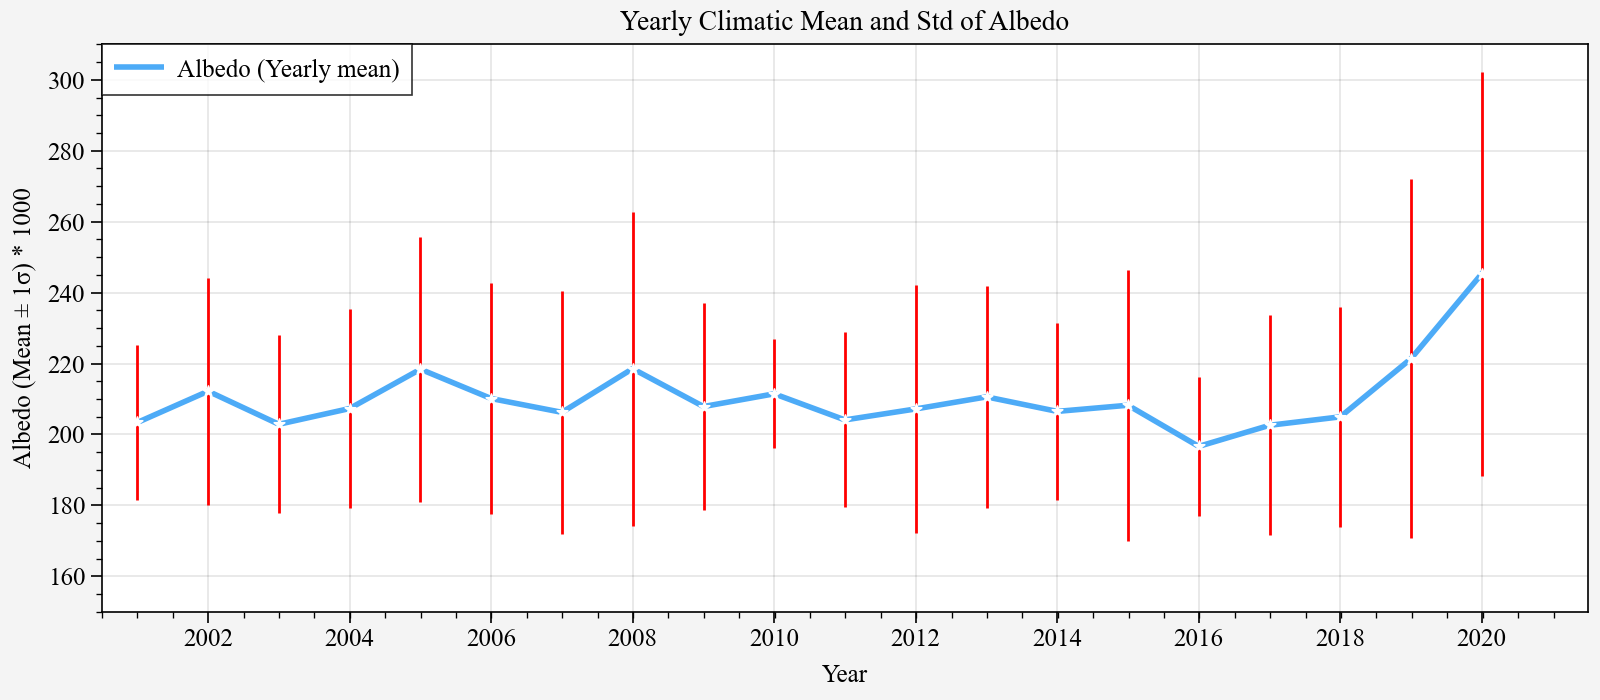

In [21]:
# albedo_climatic_mean = ecl.calc.climatic_mean(albedo_fldmean, dim='time')
albedo_climatic_mean = ecl.calc_yearly_climatological_mean(albedo_fldmean, dim='time')
albedo_climatic_std = ecl.calc_yearly_climatological_std(albedo_fldmean, dim='time')
# albedo_climatic_mean.Band1.plot(ylim=(180, 250))
fig, ax = uplt.subplot(figsize=(8, 3.5))

ax.line(
    # x=albedo_climatic_mean.time, 
    y=albedo_climatic_mean.Band1, 
    color="blue4",
    linewidth=2,
    boxdata=albedo_climatic_std.Band1,
    boxcolor = 'red',
    boxmarker = '*',
    boxmarkersize = 16,
    boxlinewidth=1,
    # shadedata = albedo_climatic_std.Band1,
    # shadelabel="± 1σ",
    # shadecolor="grey",
    label="Albedo (Yearly mean)",
    legend="ul", legend_kw={"ncol": 1},
)

# 格式化图形
ax.format(
    xlim=(np.datetime64("2000-07-01"), np.datetime64("2021-06-30")),
    ylim=(150, 310),  # 设置 y 轴范围
    ylabel="Albedo (Mean ± 1σ) * 1000",
    xlabel="Year",
    title="Yearly Climatic Mean and Std of Albedo",
    xrotation=0,
)



In [28]:
from xarrayMannKendall import Mann_Kendall_test
ds = xr.open_dataset(os.path.join(current_dir, 'albedo_yr_2001-2020.nc'))
del ds.attrs['history']
# del ds['time_bnds']
ds_trends = Mann_Kendall_test(ds.Band1, 'time', MK_modified=True,
                                method="linregress", alpha=0.05, 
                                coords_name={'time': 'time', 'x': 'lon', 'y': 'lat'})
ds_trends = ds_trends.compute()
# slope = ds_trends.trend * 10
# p_value = ds_trends.p
# slope['x'] = ds['lon'].values
# slope['y'] = ds['lat'].values
# p_value['x'] = ds['lon'].values
# p_value['y'] = gladscier['lat'].values
# ds_trends.compute()


In [29]:
slope = ds_trends.trend * 10
p_value = ds_trends.p
slope['x'] = ds['lon'].values
slope['y'] = ds['lat'].values
p_value['x'] = ds['lon'].values
p_value['y'] = ds['lat'].values


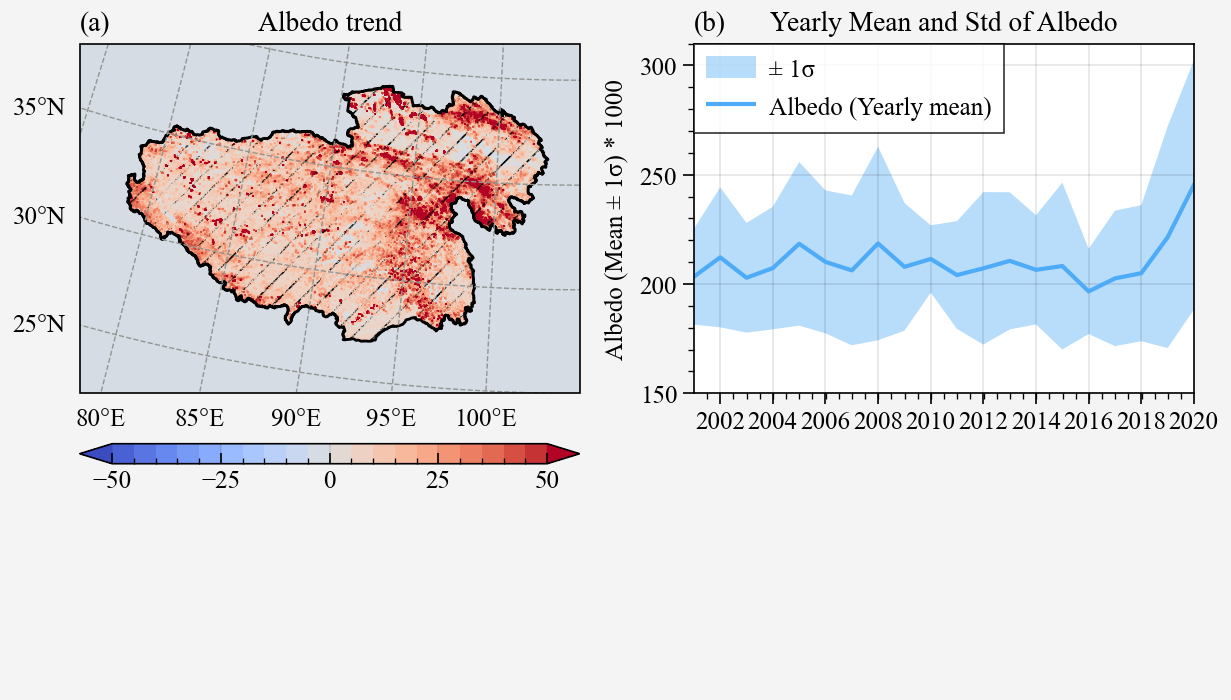

In [ ]:
fig, axes = uplt.subplots(nrows=1, ncols=2, proj=(Alberts_China, 'cart'))
axs = axes[0]
gl = axs.gridlines(
    xlocs=np.arange(75, 105 + 1, 5),
    ylocs=np.arange(25, 45 + 1, 5),
    draw_labels=True,
    x_inline=False,
    y_inline=False,
    linewidth=0.5,
    linestyle="--",
    color="gray",)
gl.top_labels, gl.right_labels, gl.rotate_labels = False, False, False

axs.coastlines()
# axs.add_feature(cartopy.feature.BORDERS, linestyle='--')
axs.add_geometries(
    Reader(tibet_shp).geometries(),
    ccrs.PlateCarree(),
    facecolor="none",
    edgecolor="k",
    linewidth=1,)

p = (slope.salem.roi(shape=tibetshp).plot.contourf(
    extend="both",
    ax=axs,
    vmax=50,
    vmin=-50,
    levels=21,
    cmap='coolwarm',
    add_colorbar=False,
    colorbar_kw={"width": 0.10, "tickdir": "in",
                #  "label": "annual average number of days with FTCs during 1961-2020 (days)", 
                },
    colorbar="b",))
_ = axs.contourf(p_value.where(p_value <= 0.05), hatches=["///"], alpha=0)

axs.format(
    # coast=True,
    # coastcolor="gray",
    # coastzorder=1,
    # rivers=True,
    # riverscolor="blue7",
    # riverslinewidth=1.0,
    labels=False,
    lonlim=(78,105),
    latlim=(25, 39),
    gridminor=False,
    grid=False,
    title = "Albedo trend",)
axr = axes[1]
# axr.plot(year, ts)
axr.line(
    # x=albedo_climatic_mean.time, 
    y=albedo_climatic_mean.Band1, 
    color="blue4",
    shadedata = albedo_climatic_std.Band1,
    shadelabel="± 1σ",
    shadecolor="grey",
    label="Albedo (Yearly mean)",
    legend="ul", legend_kw={"ncol": 1},
)
# 格式化图形
axr.format(
    ylim=(150, 310),  # 设置 y 轴范围
    ylabel="Albedo (Mean ± 1σ) * 1000",
    xlabel="Year",
    title="Yearly Mean and Std of Albedo",
    xrotation=0,
)
fig.format(
    abc='(a)',
    # suptitle='Subplot grid with a GridSpec',
    # xlabel='xlabel', ylabel='ylabel', 
)
figname = os.path.join(current_dir,"figures","albedo_yr_trends.tif")
fig.savefig(figname,
        transparent=True,
        dpi=600,
        pil_kwargs={'compression': 'tiff_lzw'},
        pad_inches=0.1,
        bbox_inches='tight')


In [ ]:
# 修改时间轴
for year in range(2001, 2021):
    # 打开数据集
    ds = xr.open_dataset(os.path.join(data_dir, f'albedo_{year}_new.nc'))
    # 创建时间范围
    time_range = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31', freq='D')
    # 为数据集分配时间坐标
    ds = ds.assign_coords(time=time_range)
    # 将数据集保存为新的文件，覆盖原有文件
    ds.to_netcdf(os.path.join(data_dir, f'albedo_{year}.nc'), mode='w')

In [ ]:
albedo_seasonal = ecl.calc_seasonal_cycle_mean(albedo_daily, dim='time')
albedo_remove_seasonal = ecl.remove_seasonal_cycle_mean(albedo_daily, dim='time')

In [ ]:
# 按月分组
daily_groups = albedo_daily.groupby('time.month').mean()
daily_groups

<a list of 1 Line2D objects>

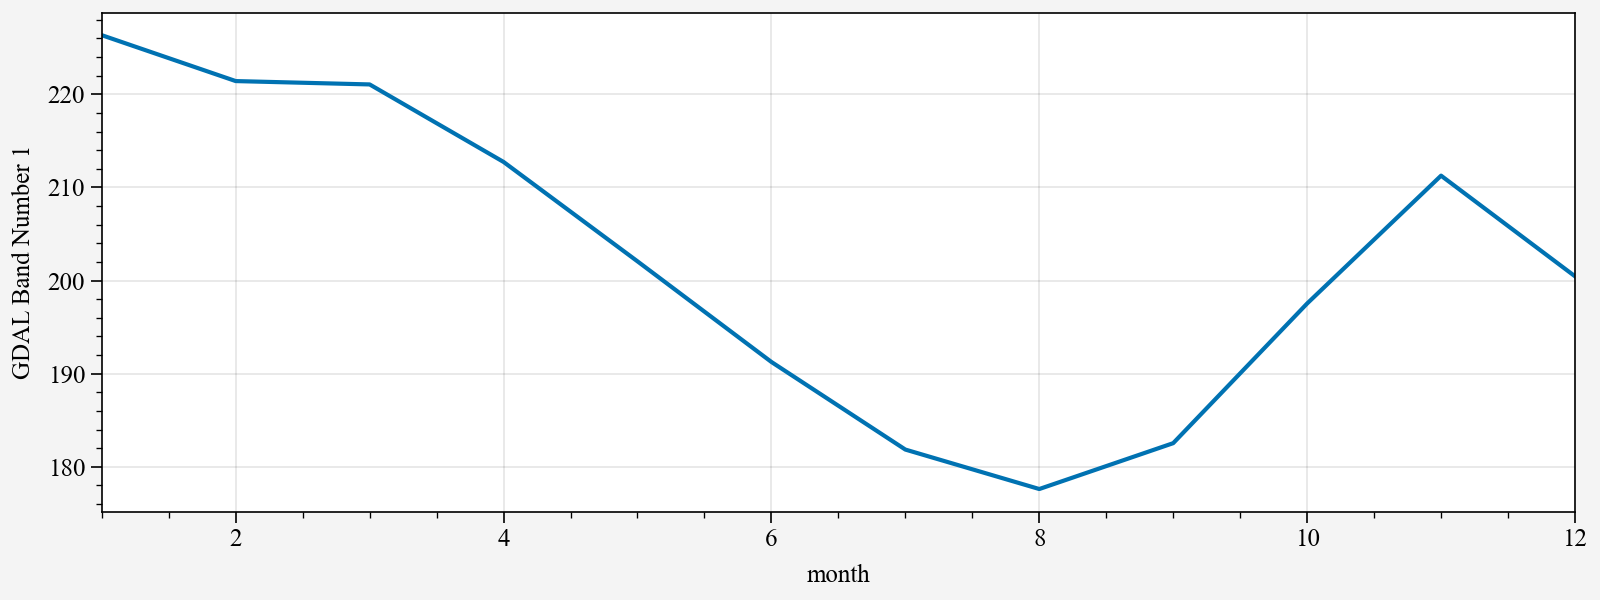

In [ ]:
fig, ax = uplt.subplots(figsize=(8,3))
x = daily_groups.month
y = daily_groups.Band1
ax.plot(x,y)

In [24]:
albedo = ds.Band1
albedo

<xarray.DataArray 'Band1' (time: 20, lat: 561, lon: 1201)> Size: 54MB
[13475220 values with dtype=float32]
Coordinates:
  * time     (time) float64 160B 2.001e+07 2.002e+07 ... 2.019e+07 2.02e+07
  * lon      (lon) float64 10kB 75.0 75.03 75.05 75.08 ... 105.0 105.0 105.0
  * lat      (lat) float64 4kB 26.0 26.02 26.05 26.07 ... 39.92 39.95 39.98 40.0
Attributes:
    long_name:     GDAL Band Number 1
    cell_methods:  time: mean
    pyproj_srs:    +proj=longlat +datum=WGS84 +no_defs

In [ ]:
ds_fldmean = ecl.utility.get_weighted_spatial_data(ds, lat_dim='lat', lon_dim='lon',
                                                        method='cos_lat').mean(dim=('lat','lon'))

In [33]:
data_dir='/home/ninglk/Chooyu/1_albedo/albedo_update'
ds = xr.open_dataset(os.path.join(data_dir,'a_20201231.nc'))


<xarray.Dataset> Size: 3MB
Dimensions:  (lat: 561, lon: 1201)
Coordinates:
  * lon      (lon) float64 10kB 75.0 75.03 75.05 75.08 ... 105.0 105.0 105.0
  * lat      (lat) float64 4kB 26.0 26.02 26.05 26.07 ... 39.92 39.95 39.98 40.0
Data variables:
    Band1    (lat, lon) float32 3MB ...
Attributes:
    CDI:                 Climate Data Interface version 2.1.0 (https://mpimet...
    Conventions:         CF-1.5
    GDAL_AREA_OR_POINT:  Area
    GDAL:                GDAL 3.6.1, released 2022/12/14
    history:             Tue Apr 11 19:20:05 2023: cdo remapbil,/mnt/f/albedo...
    CDO:                 Climate Data Operators version 2.1.0 (https://mpimet...
    pyproj_srs:          +proj=longlat +datum=WGS84 +no_defs

In [42]:
# 替换为你的文件夹路径
folder_path = "/home/ninglk/Chooyu/1_albedo/16Jan25/albedo_update"
unique_last_four = set()
# 列出文件夹内的所有文件
all_files = os.listdir(folder_path)
# 筛选出以.nc 结尾的文件
nc_files = [file for file in all_files if file.endswith('.nc')]
for nc_file in nc_files:
    name_without_ext = os.path.splitext(nc_file)[0]
    # 假设文件名的最后四位是我们想要的部分，这里可以根据实际情况修改
    last_four = name_without_ext[-4:]
    unique_last_four.add(last_four)
print(unique_last_four)
# 将唯一值集合转换为列表并排序
sorted_last_four = sorted(list(unique_last_four))

# 将排序后的结果写入到一个 txt 文件中
with open('unique_last_four.txt', 'w') as f:
    for item in sorted_last_four:
        f.write(f"{item}\n")

{'0228', '0518', '0821', '0829', '0215', '1002', '0117', '1207', '0524', '1231', '0924', '1216', '0330', '0520', '0622', '0513', '1228', '0816', '0323', '1006', '0315', '0602', '0719', '0726', '0325', '0617', '0128', '0210', '1018', '1021', '0322', '0920', '1130', '0426', '0612', '0717', '0817', '0911', '0502', '1025', '0730', '0408', '0725', '0824', '0723', '0613', '1214', '0327', '0427', '0714', '0120', '0522', '1220', '1210', '0118', '1019', '0904', '0304', '1003', '0116', '0611', '0413', '0505', '0510', '0301', '0506', '0407', '0305', '0507', '1122', '0127', '0121', '0623', '0525', '0922', '1116', '0926', '0918', '0316', '1011', '0104', '0927', '0419', '1205', '0129', '1024', '0820', '0727', '0221', '0508', '0202', '0910', '0212', '0318', '1023', '0526', '0831', '0608', '1229', '0401', '1007', '1020', '0729', '0107', '0312', '0921', '0317', '0106', '0818', '0909', '0328', '1115', '1030', '0529', '0223', '1027', '1009', '0528', '0807', '0423', '0214', '0718', '0606', '0527', '0906',

In [ ]:
%%bash
# 替换为你的文本文件路径
file_path="/home/ninglk/Chooyu/albedo/unique_last_four.txt"
data_dir='/home/ninglk/Chooyu/1_albedo/16Jan25/albedo_daily/'
rslt_dir ='/home/ninglk/Chooyu/1_albedo/16Jan25/albedo_mean_daily/'
cd $data_dir
while IFS= read -r line; do
    echo "$line"
    cdo ensmean albedo_*${line}.nc ${rslt_dir}albedo_mean_2020${line}.nc
done < "$file_path"

In [8]:
%%bash

# 替换为你的文件夹路径
folder_path='/home/ninglk/Chooyu/1_albedo/16Jan25/albedo_mean_daily'
dst_path='/home/ninglk/Chooyu/1_albedo/16Jan25/albedo_mean_daily_new'
mkdir -p $dst_path

# 遍历文件夹内的所有文件
for file in "$folder_path"/*.nc; do
    # cdo settaxis,${year}-${mon}-${day},00:00:00,1day $file $folder_path/albedo_$date.nc
    for year in $(seq 2001 2020); do
        # 获取文件名（不包括路径）
        filename=$(basename "$file")
        # 获取文件名的后 8 位
        date=${filename:12:8}
        # 获取文件名的第 3 至 6 位
        yr=${filename:12:4}
        # 获取文件名的第 7 和 8 位
        mon=${filename:16:2}
        # 获取文件名的第 9 和 10 位
        day=${filename:18:2}
        # filename=$(basename "$file")
        # echo $file
        new_filename=$(echo "$filename" | sed "s/2020/$year/g")
        # echo $new_filename
        cdo settaxis,${year}-${mon}-${day},00:00:00,1day $file $dst_path/${new_filename}
        # echo $mon$day
    done 
done

0101
0101
0101
0101
0101
0101
0101
0101
0101
0101
0101
0101
0101
0101
0101
0101
0101
0101
0101
0101
0102
0102
0102
0102
0102
0102
0102
0102
0102
0102
0102
0102
0102
0102
0102
0102
0102
0102
0102
0102
0103
0103
0103
0103
0103
0103
0103
0103
0103
0103
0103
0103
0103
0103
0103
0103
0103
0103
0103
0103
0104
0104
0104
0104
0104
0104
0104
0104
0104
0104
0104
0104
0104
0104
0104
0104
0104
0104
0104
0104
0105
0105
0105
0105
0105
0105
0105
0105
0105
0105
0105
0105
0105
0105
0105
0105
0105
0105
0105
0105
0106
0106
0106
0106
0106
0106
0106
0106
0106
0106
0106
0106
0106
0106
0106
0106
0106
0106
0106
0106
0107
0107
0107
0107
0107
0107
0107
0107
0107
0107
0107
0107
0107
0107
0107
0107
0107
0107
0107
0107
0108
0108
0108
0108
0108
0108
0108
0108
0108
0108
0108
0108
0108
0108
0108
0108
0108
0108
0108
0108
0109
0109
0109
0109
0109
0109
0109
0109
0109
0109
0109
0109
0109
0109
0109
0109
0109
0109
0109
0109
0110
0110
0110
0110
0110
0110
0110
0110
0110
0110
0110
0110
0110
0110
0110
0110
0110
0110
0110
0110


In [ ]:
%%bash

# 替换为你的文件夹路径
folder_path="/home/ninglk/Chooyu/1_albedo/16Jan25/albedo_update"

# 遍历文件夹内的所有文件
for file in "$folder_path"/*.nc; do
    # 获取文件名（不包括路径）
    filename=$(basename "$file")
    # 获取文件名的后 8 位
    date=${filename:2:8}
    # 获取文件名的第 3 至 6 位
    year=${filename:2:4}
    # 获取文件名的第 7 和 8 位
    mon=${filename:6:2}
    # 获取文件名的第 9 和 10 位
    day=${filename:8:2}
    cdo settaxis,${year}-${mon}-${day},00:00:00,1day $file $folder_path/albedo_$date.nc
done